# Machine Learning Homework 3

In [654]:
import pandas as pd
import numpy as np
from scipy.stats import multivariate_normal, uniform
import matplotlib.pyplot as plt
%matplotlib inline

## Question 1

In [23]:
mu1 = [0, 0]
mu2 = [3, 0]
mu3 = [0, 3]
sig1 = [[1, 0], [0, 1]]
sig2 = [[1, 0], [0, 1]]
sig3 = [[1, 0], [0, 1]]
weights = [0.2, 0.7, 1.0]

In [24]:
sims = []
for i in range(500):
    rand = uniform.rvs()
    if rand < weights[0]:
        mu = mu1
        sig = sig1
    elif rand < weights[1]:
        mu = mu2
        sig = sig2
    else:
        mu = mu3
        sig = sig3
    sims.append(multivariate_normal.rvs(mu, sig))

(array([ 11.,  49.,  95., 104.,  71.,  42.,  64.,  42.,  18.,   4.]),
 array([-2.59675622, -1.76865585, -0.94055548, -0.11245511,  0.71564526,
         1.54374563,  2.371846  ,  3.19994637,  4.02804674,  4.85614711,
         5.68424748]),
 <a list of 10 Patch objects>)

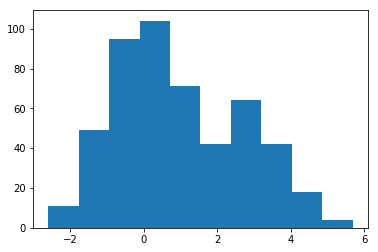

In [26]:
plt.hist(np.transpose(sims)[1])

In [193]:
def coordinate_descent(data, k = 2):
    k_coords = []
    for i in range(k):
        k_coords.append([i, i])
    losses = []
    for i in range(20):
        ci = find_ci(data, k_coords)
        k_coords = find_k_coords(data, ci, k)
        loss = k_means_loss(data, ci, k_coords, k)
        losses.append(loss)
    return (ci, losses)

def find_ci(data, k_coords):
    ci = []
    for point in data:
        min_dist = float('inf')
        min_k = None
        i = 0
        for coord in k_coords:
            dist = distance(point, coord)
            if dist < min_dist:
                min_dist = dist
                min_k = i
            i += 1
        ci.append(min_k)
    return np.array(ci)

def find_k_coords(data, ci, k):
    data = np.array(data)
    k_coords = []
    for i in range(k):
        points = data[ci==i]
        k_coord = np.mean(points, axis=0)
        k_coords.append(k_coord)
    return k_coords

def k_means_loss(data, ci, k_coords, k):
    loss = 0
    data = np.array(data)
    ci = np.array(ci)
    for i in range(k):
        coord = k_coords[i]
        d = data[ci == i]
        for datum in d:
            loss += distance(coord, datum)
    return loss

def distance(a, b):
    a = np.array(a)
    b = np.array(b)
    ans = np.sqrt(np.sum((a-b)**2))
    return ans

In [194]:
data = [[0,0],[1,1],[2,2],[3,3]]
k_coords = np.array([[0,0],[1,1]])
ci = find_ci(data, k_coords)
k_coords = find_k_coords(data, ci, 2)
k_means_loss(data, ci, k_coords, 2)

2.8284271247461903

In [195]:
k_coords = []
for k in range(2,6):
    out = coordinate_descent(sims, k)
    k_coords.append(out)

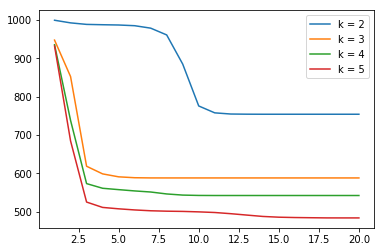

In [202]:
for i in range(4):
    ci = k_coords[i][0]
    losses = k_coords[i][1]
    plt.plot(range(1,21), losses, label= 'k = ' + str(i+2))
_= plt.legend()

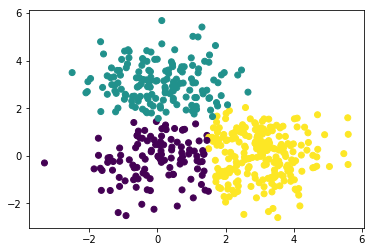

In [216]:
k_3 = k_coords[1][0]
x = np.transpose(sims)[0]
y = np.transpose(sims)[1]
plt.scatter(x, y, c=k_3)

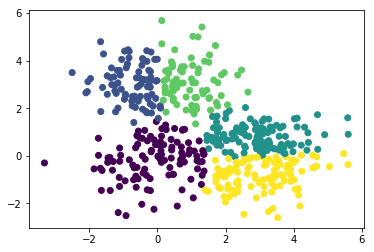

In [217]:
k_5 = k_coords[3][0]
x = np.transpose(sims)[0]
y = np.transpose(sims)[1]
plt.scatter(x, y, c=k_5)

# Question 2

In [655]:
from scipy.stats import multivariate_normal as mvn

In [552]:
X_train = pd.read_csv("Prob2_Xtrain.csv", header=None)
y_train = pd.read_csv("Prob2_ytrain.csv", header=None)
X_test = pd.read_csv("Prob2_Xtest.csv", header=None)
y_test = pd.read_csv("Prob2_ytest.csv", header=None)

In [288]:
X_train0 = X_train[y_train[0]==0]
X_train1 = X_train[y_train[0]==1]
y_train0 = y_train[y_train[0]==0]
y_train1 = y_train[y_train[0]==1]

In [698]:
def em_gmm(X, pis, mus, sigmas, max_iter=30):
    n, p = X.shape
    k = len(pis)

    ll_old = 0
    lls = [ll_old]

    def scale(vec):
        return vec / np.sum(vec)

    for i in range(max_iter):
        #E part
        ws = np.zeros((n, k))
        for j in range(k):
            ws[:, j] = pis[j] * mvn(mus[j], sigmas[j]).pdf(X) 
        ws = np.apply_along_axis(scale, 1, ws)

        #M part
        nks = np.sum(ws, axis=0)
        pis = nks/n
        mus = np.transpose(np.dot(np.transpose(X), ws) / nks)

        for j in range(k):
            phis = ws[:,j]
            nk = nks[j]
            sigma = np.dot(((X - mus[j]).T * phis),(X - mus[j]))/ nk
            sigmas[j] = sigma

        #find new LLs
        ll_new = 0
        for pi, mu, sigma in zip(pis, mus, sigmas):
            ll_new += pi*mvn(mu, sigma).pdf(X)
        ll_new = np.log(ll_new).sum()
        ll_old = ll_new
        lls.append(ll_old)
        
    return (pis, mus, sigmas, lls)

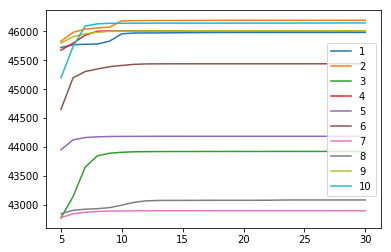

In [699]:
k = 3
X = X_train1
y = y_train1
out1 = []

for i in range(10):  
    mu = np.mean(X)
    sigma = np.cov(X, rowvar =False)
    mus = mvn.rvs(mu, sigma, size=k)
    sigmas = []
    for j in range(k):
        sigmas.append(sigma.copy())
    pis = np.repeat(1/k, k)
    res = em_gmm(X, pis, mus, sigmas)
    out1.append(res)
    plt.plot(range(5,31), res[3][5:], label=str(i+1))
_ = plt.legend()

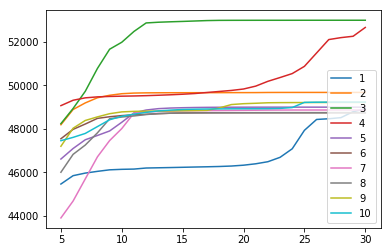

In [700]:
k = 3
X = X_train0
y = y_train0
out0 = []

for i in range(10):  
    mu = np.mean(X)
    sigma = np.cov(X, rowvar =False)
    mus = mvn.rvs(mu, sigma, size=k)
    sigmas = []
    for j in range(k):
        sigmas.append(sigma.copy())
    pis = np.repeat(1/k, k)
    res = em_gmm(X, pis, mus, sigmas)
    out0.append(res)
    plt.plot(range(5,31), res[3][5:], label=str(i+1))
_ = plt.legend()

In [584]:
def predict(x, p, best0, best1, k):
    pis0 = best0[0]
    mus0 = best0[1]
    sigmas0 = best0[2]
    pis1 = best1[0]
    mus1 = best1[1]
    sigmas1 = best1[2]

    prob0 = 0
    prob1 = 0
    for i in range(k):
        prob0 += pis0[i] * mvn(mus0[i], sigmas0[i]).pdf(x)
        prob1 += pis1[i] * mvn(mus1[i], sigmas1[i]).pdf(x)
    prob0 *= p
    prob1 *= (1 - p)
    if prob0 > prob1:
        return 0
    else:
        return 1

In [701]:
best1 = out1[1]
best0 = out0[2]
p = y_train1.shape[0] / y_train.shape[0]
x = X_test.iloc[-4]

preds = X_test.apply(lambda x: predict(x, p, best0, best1, k), axis=1)

matrix = [[0,0],[0,0]]
for i in range(len(preds)):
    pred = preds[i]
    actual = y_test[0].values[i]
    matrix[pred][actual] += 1

print(matrix[0], '\n', matrix[1])
print("accuracy is: ", (matrix[0][0] + matrix[1][1]) / 460)

[203, 9] 
 [75, 173]
accuracy is:  0.8173913043478261


In [702]:
def build_predictor(k):
    X = X_train1
    y = y_train1 

    mu = np.mean(X)
    sigma = np.cov(X, rowvar =False)
    mus = mvn.rvs(mu, sigma, size=k)
    if k == 1:
        mus = [mus]
    sigmas = []
    for j in range(k):
        sigmas.append(sigma.copy())
    pis = np.repeat(1/k, k)
    best1 = em_gmm(X, pis, mus, sigmas)

    X = X_train0
    y = y_train0

    mu = np.mean(X)
    sigma = np.cov(X, rowvar =False)
    mus = mvn.rvs(mu, sigma, size=k)
    if k == 1:
        mus = [mus]
    sigmas = []
    for j in range(k):
        sigmas.append(sigma.copy())
    pis = np.repeat(1/k, k)
    best0 = em_gmm(X, pis, mus, sigmas)
    
    def predict(x):
        p = 0.3939613526570048
        pis0 = best0[0]
        mus0 = best0[1]
        sigmas0 = best0[2]
        pis1 = best1[0]
        mus1 = best1[1]
        sigmas1 = best1[2]

        prob0 = 0
        prob1 = 0
        for i in range(k):
            prob0 += pis0[i] * mvn(mus0[i], sigmas0[i]).pdf(x)
            prob1 += pis1[i] * mvn(mus1[i], sigmas1[i]).pdf(x)
        prob0 *= p
        prob1 *= (1 - p)
        if prob0 > prob1:
            return 0
        else:
            return 1
    return predict

In [705]:
gmm_1 = build_predictor(1)
gmm_2 = build_predictor(2)
gmm_3 = build_predictor(3)
gmm_4 = build_predictor(4)

In [710]:
preds = X_test.apply(gmm_1, axis=1)

matrix = [[0,0],[0,0]]
for i in range(len(preds)):
    pred = preds[i]
    actual = y_test[0].values[i]
    matrix[pred][actual] += 1

print(matrix[0], '\n', matrix[1])
print("For k = 1, accuracy is: ", (matrix[0][0] + matrix[1][1]) / 460)

[180, 6] 
 [98, 176]
For k = 1, accuracy is:  0.7739130434782608


In [711]:
preds = X_test.apply(gmm_2, axis=1)

matrix = [[0,0],[0,0]]
for i in range(len(preds)):
    pred = preds[i]
    actual = y_test[0].values[i]
    matrix[pred][actual] += 1

print(matrix[0], '\n', matrix[1])
print("For k = 2, accuracy is: ", (matrix[0][0] + matrix[1][1]) / 460)

[194, 8] 
 [84, 174]
For k = 2, accuracy is:  0.8


In [712]:
preds = X_test.apply(gmm_3, axis=1)

matrix = [[0,0],[0,0]]
for i in range(len(preds)):
    pred = preds[i]
    actual = y_test[0].values[i]
    matrix[pred][actual] += 1

print(matrix[0], '\n', matrix[1])
print("For k = 3, accuracy is: ", (matrix[0][0] + matrix[1][1]) / 460)

[226, 14] 
 [52, 168]
For k = 3, accuracy is:  0.8565217391304348


In [713]:
preds = X_test.apply(gmm_4, axis=1)

matrix = [[0,0],[0,0]]
for i in range(len(preds)):
    pred = preds[i]
    actual = y_test[0].values[i]
    matrix[pred][actual] += 1

print(matrix[0], '\n', matrix[1])
print("For k = 4, accuracy is: ", (matrix[0][0] + matrix[1][1]) / 460)

[200, 9] 
 [78, 173]
For k = 4, accuracy is:  0.8108695652173913


## Question 3

In [649]:
df = pd.read_csv('Prob3_ratings.csv', header= None)
df_test = pd.read_csv('Prob3_ratings_test.csv', header= None)
df.columns = ['uid','movie_id','rating']
df_test.columns = ['uid','movie_id','rating']

In [650]:
num_users = df['uid'].max()
num_movies = df['movie_id'].max()
M = np.zeros((num_users, num_movies))
M_test = np.zeros((num_users, num_movies))

In [651]:
for row in df.iterrows():
    user = int(row[1]['uid']-1)
    movie = int(row[1]['movie_id']-1)
    M[user, movie] = row[1]['rating']

In [652]:
for row in df_test.iterrows():
    user = int(row[1]['uid']-1)
    movie = int(row[1]['movie_id']-1)
    M_test[user, movie] = row[1]['rating']

In [658]:
U = mvn.rvs(np.zeros(10), np.identity(10), size=num_users)
V = mvn.rvs(np.zeros(10),np.identity(10), size=num_movies)

In [645]:
df.shape

(95000, 3)